In [1]:
# LOAD JSONS   train_data e test_data

import json
import pandas as pd
import os

# --- Define the path to our data ---
train_file_path = 'train.jsonl'
test_file_path  = 'test.jsonl'

train_data = []
test_data  = []

# --- Load TRAIN data ---
print(f"📦 Loading data from '{train_file_path}'...")
try:
    with open(train_file_path, 'r') as f:
        for line in f:
            train_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(train_data)} battles from train.")
    
    # Show structure of first train battle
    if train_data:
        print("\n--- Structure of the first train battle: ---")
        first_battle = train_data[0]
        battle_for_display = first_battle.copy()
        battle_for_display['battle_timeline'] = first_battle.get('battle_timeline', [])[:2]
        print(json.dumps(battle_for_display, indent=4))
        if len(first_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the training file at '{train_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


# --- Load TEST data ---
print(f"\n📦 Loading data from '{test_file_path}'...")
try:
    with open(test_file_path, 'r') as f:
        for line in f:
            test_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(test_data)} battles from test.")
    
    # Optional: inspect the first test battle
    if test_data:
        print("\n--- Structure of the first test battle: ---")
        first_test_battle = test_data[0]
        test_display = first_test_battle.copy()
        test_display['battle_timeline'] = test_display.get('battle_timeline', [])[:2]
        print(json.dumps(test_display, indent=4))
        if len(first_test_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the test file at '{test_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


📦 Loading data from 'train.jsonl'...
✅ Successfully loaded 10000 battles from train.

--- Structure of the first train battle: ---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",
                "notype"
    

In [2]:
#Per vedere i dati in dataframe, divisi in 4 blocchi dove squadra==p1 e pokemon==p2
import pandas as pd

def create_dataframe(data):
    # DataFrame generale con info di base
    df_battle = pd.DataFrame([{
        "battle_id": b["battle_id"],
        "player_won": b.get("player_won", None)  # nel test non esiste
    } for b in data])

    # DataFrame con i Pokémon della squadra del giocatore (p1_team_details)
    df_squad = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "name": p["name"],
            "level": p["level"],
            "types": p["types"],
            "base_hp": p["base_hp"],
            "base_atk": p["base_atk"],
            "base_def": p["base_def"],
            "base_spa": p["base_spa"],
            "base_spd": p["base_spd"],
            "base_spe": p["base_spe"]
        }
        for b in data
        for p in b["p1_team_details"]
    ])

    # DataFrame con dettagli del lead Pokémon dell'avversario
    df_pokemon = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "name": b["p2_lead_details"]["name"],
            "level": b["p2_lead_details"]["level"],
            "types": b["p2_lead_details"]["types"],
            "base_hp": b["p2_lead_details"]["base_hp"],
            "base_atk": b["p2_lead_details"]["base_atk"],
            "base_def": b["p2_lead_details"]["base_def"],
            "base_spa": b["p2_lead_details"]["base_spa"],
            "base_spd": b["p2_lead_details"]["base_spd"],
            "base_spe": b["p2_lead_details"]["base_spe"]
        }
        for b in data
    ])

    # DataFrame con la timeline dei turni
    df_battle_timeline = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "turn": t["turn"],
            "p1_pokemon": t["p1_pokemon_state"]["name"],
            "p1_hp": t["p1_pokemon_state"]["hp_pct"],
            "p1_status": t["p1_pokemon_state"]["status"],
            "p1_effects": t["p1_pokemon_state"]["effects"],
            "p1_boosts": t["p1_pokemon_state"]["boosts"],
            "p2_pokemon": t["p2_pokemon_state"]["name"],
            "p2_hp": t["p2_pokemon_state"]["hp_pct"],
            "p2_status": t["p2_pokemon_state"]["status"],
            "p2_effects": t["p2_pokemon_state"]["effects"],
            "p2_boosts": t["p2_pokemon_state"]["boosts"],
            "p1_move_name": t["p1_move_details"]["name"] if t["p1_move_details"] else None,
            "p1_move_type": t["p1_move_details"]["type"] if t["p1_move_details"] else None,
            "p1_move_cat": t["p1_move_details"]["category"] if t["p1_move_details"] else None,
            "p1_move_basepow": t["p1_move_details"]["base_power"] if t["p1_move_details"] else None,
            "p1_move_acc": t["p1_move_details"]["accuracy"] if t["p1_move_details"] else None,
            "p1_move_priority": t["p1_move_details"]["priority"] if t["p1_move_details"] else None,
            "p2_move_name": t["p2_move_details"]["name"] if t["p2_move_details"] else None,
            "p2_move_type": t["p2_move_details"]["type"] if t["p2_move_details"] else None,
            "p2_move_cat": t["p2_move_details"]["category"] if t["p2_move_details"] else None,
            "p2_move_basepow": t["p2_move_details"]["base_power"] if t["p2_move_details"] else None,
            "p2_move_acc": t["p2_move_details"]["accuracy"] if t["p2_move_details"] else None,
            "p2_move_priority": t["p2_move_details"]["priority"] if t["p2_move_details"] else None
        }
        for b in data
        for t in b["battle_timeline"]
    ])

    return [df_battle, df_squad, df_pokemon, df_battle_timeline]

#train_data e test_data
#battle,squad,pokemon,timeline
train_list=create_dataframe(train_data)
test_list=create_dataframe(test_data)

MODELLO STATICO

Funzioni utili

In [3]:
#Create pokedex
def create_pokedex(lista_df):
    df_list=lista_df
    df_squad=df_list[1]
    df_pokemon=df_list[2]
    df_all_pokemon = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all_pokemon["types"] = df_all_pokemon["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)

    # Mantieni solo Pokémon unici per nome (se stessi nomi → stessi tipi e stats)
    df_all_pokemon = (
        df_all_pokemon.drop_duplicates(subset=["name", "types"])
        .reset_index(drop=True)
    )
    #print(f"Pokedex creato con {len(df_all_pokemon)} Pokémon unici ")
    return df_all_pokemon

In [4]:
#Funzione per ottenere i tipi dei pokemon(UNICI)
def unique_t(lista):
    df_pokemon=lista[2]
    df_squad=lista[1]
    unique_types = sorted(
        set(
            t
            for types_list in pd.concat([df_pokemon["types"], df_squad["types"]])
            for t in types_list
        )
    )
    unique_types.remove("notype")
    return unique_types

In [5]:
#Codice che tramite battle timeline prende il tipo per ogni pokemon della seconda squadra
def tipiSquadra2(df,lista,lista_df):
    df_pokedex=create_pokedex(lista_df)[["name", "types"]]
    df_battle_timeline=lista_df[3]
    
    for tipo in lista:
        col = f"p2_{tipo}"
        if col not in df.columns:
            df[col] = 0
    
    # --- Itera su ogni battaglia ---
    for battle_id in df["battle_id"].unique():
        #Ottieni la lista di Pokémon P2 in quella battaglia
        p2_pokemon_list = (
            df_battle_timeline.loc[df_battle_timeline["battle_id"] == battle_id, "p2_pokemon"]
            .dropna()
            .unique()
            .tolist()
        )
        # Filtra il pokedex per quei Pokémon
        df_p2_pokemons = df_pokedex[df_pokedex["name"].isin(p2_pokemon_list)].copy()
        types_list = [t for types in df_p2_pokemons["types"] for t in types if t != "notype"]
        # Aggiorna la riga corrispondente nel dataframe df
        for elem in types_list:
            col = f"p2_{elem}"
            #if col in df.columns:  # aggiorna solo se la colonna esiste
            df.loc[df["battle_id"] == battle_id, col] += 1
    return df
        

In [6]:
#Codice che tramite battle timeline prende valori per ogni pokemon della seconda squadra
def diffmediaSquadra2(df,lista_df):
    df_pokedex=create_pokedex(lista_df)
    df_battle_timeline=lista_df[3]
    stats_list = []
    stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]

    # --- Itera su ogni battaglia ---
    for battle_id in df["battle_id"].unique():
        #Ottieni la lista di Pokémon P2 in quella battaglia
        p2_pokemon_list = (
            df_battle_timeline.loc[df_battle_timeline["battle_id"] == battle_id, "p2_pokemon"]
            .dropna()
            .unique()
            .tolist()
        )
        # Filtra il pokedex per quei Pokémon
        df_p2_pokemons = df_pokedex[df_pokedex["name"].isin(p2_pokemon_list)]
        if df_p2_pokemons.empty:
            continue  # Salta se non ci sono Pokémon validi

        # Aggiorna la riga corrispondente nel dataframe df
        mean_stats = df_p2_pokemons[[
            "base_hp", "base_atk", "base_def",
            "base_spa", "base_spd", "base_spe", "level"
        ]].mean()

        for stat in stats:
            col = f"{stat}"
            df.loc[df["battle_id"] == battle_id, col] -= mean_stats[stat]

    return df

Codice finale

In [7]:
import pandas as pd

def extract_feature_diff(lista,isTrain):
    df_battle = lista[0]
    df_squad = lista[1]
    df_pokemon=lista[2]
    unique_types = unique_t(lista)  # funzione che restituisce tutti i tipi unici

    # --- PLAYER 1 ---
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])
    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()
    #print(agg_squad1.columns)
    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: lst.count(t))

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={
            "p1_battle_id": "battle_id",
            "p1_base_hp": "base_hp",
            "p1_base_atk": "base_atk",
            "p1_base_def": "base_def",
            "p1_base_spa": "base_spa",
            "p1_base_spd": "base_spd",
            "p1_base_spe": "base_spe",
            "p1_level": "level"
            })
    )

    # --- PLAYER 2 ---
    
    # --- UNIONE ---
    agg_full = agg_squad1.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")
    agg_full=tipiSquadra2(agg_full.fillna(0),unique_types,lista)
    #controllo per evitare errori durante test
    # Se il dataset è di train, converti la colonna; se è di test, lasciala così
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None
    # --- DIFFERENZE TRA P1 E P2 ---
    #agg_full=diffmediaSquadra2(agg_full,lista)
    base_stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]
    for stat in base_stats:
        agg_full[stat] = agg_full[stat] - df_pokemon[stat]
    # --- X RIMUOVERE LE FEATURE ORIGINALI, sarebbero ridondanti 
    print("Statistica: ",agg_full.columns)
    return agg_full

VERSIONE TIPI BINARI

In [8]:
def tipiSquadra2_bin(df, lista, lista_df):

    df_pokedex = create_pokedex(lista_df)[["name", "types"]]
    df_battle_timeline = lista_df[3]

    # Inizializza le colonne per tutti i tipi
    for tipo in lista:
        col = f"p2_{tipo}"
        if col not in df.columns:
            df[col] = 0

    # --- Itera su ogni battaglia ---
    for battle_id in df["battle_id"].unique():
        # Lista unica di Pokémon di P2 in questa battaglia
        p2_pokemon_list = (
            df_battle_timeline.loc[df_battle_timeline["battle_id"] == battle_id, "p2_pokemon"]
            .dropna()
            .unique()
            .tolist()
        )
        if not p2_pokemon_list:
            continue

        # Recupera i loro tipi dal pokedex
        df_p2_pokemons = df_pokedex[df_pokedex["name"].isin(p2_pokemon_list)].copy()
        types_list = [t for types in df_p2_pokemons["types"] for t in types if t != "notype"]

        # Setta 1 per ogni tipo presente nella squadra P2
        for tipo in set(types_list):  # set evita duplicazioni
            col = f"p2_{tipo}"
            if col in df.columns:
                df.loc[df["battle_id"] == battle_id, col] = 1

    return df


In [9]:
import pandas as pd

def extract_feature_diff_bin(lista, isTrain):
    """
    Crea feature statiche e binarie per P1 e P2 (nessuna media timeline o leakage).
    """

    df_battle = lista[0]
    df_squad = lista[1]

    unique_types = unique_t(lista)  # lista di tipi unici

    # =============================
    # === PLAYER 1 (statico) ===
    # =============================
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])

    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()

    # Conta quanti Pokémon per tipo in P1
    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: 1 if t in lst else 0)

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={
            "p1_battle_id": "battle_id",
            "p1_base_hp": "base_hp",
            "p1_base_atk": "base_atk",
            "p1_base_def": "base_def",
            "p1_base_spa": "base_spa",
            "p1_base_spd": "base_spd",
            "p1_base_spe": "base_spe",
            "p1_level": "level"
        })
    )

    # =============================
    # === PLAYER 2 (binario) ===
    # =============================
    agg_full = agg_squad1.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")

    # Aggiunge le colonne binarie per i tipi di P2
    agg_full = tipiSquadra2_bin(agg_full.fillna(0), unique_types, lista)

    # =============================
    # === TARGET e DIFFERENZE ===
    # =============================
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None

    # Applica funzione di differenze statiche (non timeline)
    agg_full = diffmediaSquadra2(agg_full, lista)

    agg_full = agg_full.fillna(0)

    print("✅ Feature estratte:", len(agg_full.columns))
    return agg_full


MODELLO DINAMICO

Funzioni utili

In [10]:
#funzione per ottenere tutti i tipi di status e effetti(UNICI)
import pandas as pd
def unique_se(lista):
    df_battle_timeline=lista[3]
    # Unione dei due campi status
    all_status = pd.concat([
        df_battle_timeline['p1_status'],
        df_battle_timeline['p2_status']
    ], ignore_index=True)
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )   
    unique_status.remove("nostatus")
    print("status unici:", unique_status)

    all_effects = []

    for col in ["p1_effects", "p2_effects"]:
        for row in df_battle_timeline[col].dropna():
            if isinstance(row, list):
                all_effects.extend(row)
            elif isinstance(row, str):
                all_effects.append(row)

    unique_effects = sorted(set(all_effects))
    unique_effects.remove("noeffect")
    print("EFFECTS unici:", unique_effects)
    return unique_status,unique_effects

#unique_status,unique_effects=unique_se(train_list)

In [11]:
#Funzione che conta le occorrenze degli status
def status_counts(df, prefix,unique):
  counts = (
      df.groupby(['battle_id', f'{prefix}_status'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )

  counts = counts[['battle_id'] + unique]

  #Aggiungiamo tutti gli status presenti nel df
  for st in unique:
    if st not in counts.columns:
        counts[st] = 0
  
  counts.columns = ['battle_id'] + [f'{prefix}_status_{c}' for c in counts.columns if c != 'battle_id']
  return counts

In [12]:
#Funzione che conta le occorrenze degli effetti
from collections import Counter
import pandas as pd

def effects_counts(df, prefix,unique):
    rows = []
    for bid, group in df.groupby('battle_id'):
        all_effects = []
        for eff in group[f'{prefix}_effects'].dropna():
            if isinstance(eff, list):
                all_effects.extend(eff)
            elif isinstance(eff, str):
                all_effects.append(eff)
        # Conta le occorrenze di ogni effetto
        counts = Counter(all_effects)
        # Crea un dizionario con battle_id + contatori
        rows.append({'battle_id': bid, **counts})

    # 🔹 Converte in DataFrame
    eff_df = pd.DataFrame(rows).fillna(0)

    # 🔹 Aggiungi eventuali colonne mancanti per effetti non osservati
    for eff in unique:
        if eff not in eff_df.columns:
            eff_df[eff] = 0

    # 🔹 Riordina le colonne secondo l’ordine di unique_effects
    eff_df = eff_df[['battle_id'] + unique]

    # 🔹 Rinomina con prefisso (p1_effect_xxx, p2_effect_xxx, ...)
    eff_df.columns = ['battle_id'] + [f'{prefix}_effect_{c}' for c in unique]

    return eff_df

In [13]:
#MATRICE DEI VANTAGGI
tipi=unique_t(train_list)
#Matrice neutra
df_chart = pd.DataFrame(1.0, index=tipi, columns=tipi)
#print(df_chart)
#TO DO: ottenere questa matrice in modo dinamico
type_chart = {
    "normal":  {"rock": 0.5, "ghost": 0, "steel": 0.5},
    "fire":    {"fire": 0.5, "water": 0.5, "grass": 2, "ice": 2, "bug": 2, "rock": 0.5, "dragon": 0.5, "steel": 2},
    "water":   {"fire": 2, "water": 0.5, "grass": 0.5, "ground": 2, "rock": 2, "dragon": 0.5},
    "electric":{"water": 2, "electric": 0.5, "grass": 0.5, "ground": 0, "flying": 2, "dragon": 0.5},
    "grass":   {"fire": 0.5, "water": 2, "grass": 0.5, "poison": 0.5, "ground": 2, "flying": 0.5, "bug": 0.5, "rock": 2, "dragon": 0.5, "steel": 0.5},
    "ice":     {"fire": 0.5, "water": 0.5, "grass": 2, "ground": 2, "flying": 2, "dragon": 2, "steel": 0.5},
    "fighting":{"normal": 2, "ice": 2, "rock": 2, "dark": 2, "steel": 2, "poison": 0.5, "flying": 0.5, "psychic": 0.5, "bug": 0.5, "ghost": 0, "fairy": 0.5},
    "poison":  {"grass": 2, "poison": 0.5, "ground": 0.5, "rock": 0.5, "ghost": 0.5, "steel": 0, "fairy": 2},
    "ground":  {"fire": 2, "electric": 2, "grass": 0.5, "poison": 2, "flying": 0, "bug": 0.5, "rock": 2, "steel": 2},
    "flying":  {"grass": 2, "electric": 0.5, "rock": 0.5, "fighting": 2, "bug": 2, "steel": 0.5},
    "psychic": {"fighting": 2, "poison": 2, "psychic": 0.5, "dark": 0, "steel": 0.5},
    "bug":     {"grass": 2, "psychic": 2, "dark": 2, "fire": 0.5, "fighting": 0.5, "poison": 0.5, "flying": 0.5, "ghost": 0.5, "steel": 0.5, "fairy": 0.5},
    "rock":    {"fire": 2, "ice": 2, "flying": 2, "bug": 2, "fighting": 0.5, "ground": 0.5, "steel": 0.5},
    "ghost":   {"psychic": 2, "ghost": 2, "dark": 0.5, "normal": 0},
    "dragon":  {"dragon": 2, "steel": 0.5, "fairy": 0},
    "dark":    {"psychic": 2, "ghost": 2, "fighting": 0.5, "dark": 0.5, "fairy": 0.5},
    "steel":   {"rock": 2, "ice": 2, "fairy": 2, "fire": 0.5, "water": 0.5, "electric": 0.5, "steel": 0.5},
    "fairy":   {"fighting": 2, "dragon": 2, "dark": 2, "fire": 0.5, "poison": 0.5, "steel": 0.5},
}
# Riempie la matrice con i moltiplicatori corretti
for att, targets in type_chart.items():
    if att not in df_chart.index:
        continue
    for deff, mult in targets.items():
        if deff in df_chart.columns:  # aggiunge solo se anche il difensore esiste
            df_chart.loc[att, deff] = mult
print(df_chart)

          dragon  electric  fire  flying  ghost  grass  ground  ice  normal  \
dragon       2.0       1.0   1.0     1.0    1.0    1.0     1.0  1.0     1.0   
electric     0.5       0.5   1.0     2.0    1.0    0.5     0.0  1.0     1.0   
fire         0.5       1.0   0.5     1.0    1.0    2.0     1.0  2.0     1.0   
flying       1.0       0.5   1.0     1.0    1.0    2.0     1.0  1.0     1.0   
ghost        1.0       1.0   1.0     1.0    2.0    1.0     1.0  1.0     0.0   
grass        0.5       1.0   0.5     0.5    1.0    0.5     2.0  1.0     1.0   
ground       1.0       2.0   2.0     0.0    1.0    0.5     1.0  1.0     1.0   
ice          2.0       1.0   0.5     2.0    1.0    2.0     2.0  1.0     1.0   
normal       1.0       1.0   1.0     1.0    0.0    1.0     1.0  1.0     1.0   
poison       1.0       1.0   1.0     1.0    0.5    2.0     0.5  1.0     1.0   
psychic      1.0       1.0   1.0     1.0    1.0    1.0     1.0  1.0     1.0   
rock         1.0       1.0   2.0     2.0    1.0    1

In [14]:
#Funzione per calcolare i vantaggi per ogni mossa
import numpy as np
def compute_type_advantage(df_battle_timeline, df_chart,df_list):
    df = df_battle_timeline
    df_pokedex=create_pokedex(df_list)[["name", "types"]]

    # attacchi con vantaggi di tipo
    res = []
    
    for _, row in df.iterrows():
        battle_id = row["battle_id"]
        t1 = row["p1_move_type"].lower() if pd.notna(row["p1_move_type"]) else None
        t2 = row["p2_move_type"].lower()if pd.notna(row["p2_move_type"]) else None
        eff_p1,eff_p2= np.nan, np.nan
        if pd.notna(t1):#Attaca il p2 e difende p1
            p1 = row["p1_pokemon"]
            tipi = df_pokedex.loc[df_pokedex["name"] == p1, "types"]
            tipi=tipi.iloc[0]#Ho la tupla
            
            eff1 = df_chart.loc[t2, tipi[0]] if t2 in df_chart.index and tipi[0] in df_chart.columns else 1.0
            eff2 = df_chart.loc[t2, tipi[1]] if t2 in df_chart.index and tipi[1] in df_chart.columns else 1.0
            eff_p1=max(eff1,eff2)
        elif pd.notna(t2):#Attaca il p1 e difende p2
            p2 = row["p2_pokemon"]
            tipi = df_pokedex.loc[df_pokedex["name"] == p2, "types"]
            tipi=tipi.iloc[0]

            eff1 = df_chart.loc[t1, tipi[0]] if t1 in df_chart.index and tipi[0] in df_chart.columns else 1.0
            eff2 = df_chart.loc[t1, tipi[1]] if t1 in df_chart.index and tipi[1] in df_chart.columns else 1.0
            eff_p2=max(eff1,eff2)
        else: 
            continue

        res.append({"battle_id": battle_id,
                        "eff_p1_on_p2": eff_p1,
                        "eff_p2_on_p1": eff_p2})

    df_eff = (pd.DataFrame(res)
              .groupby("battle_id", as_index=False)
              .mean(numeric_only=True)
              .assign(type_adv_diff=lambda x: x["eff_p1_on_p2"] - x["eff_p2_on_p1"]))


    # media per battaglia
    return df_eff
#print(compute_type_advantage(train_list[3], df_chart))

In [15]:
#Funzione per calcolare i vantaggi per ogni mossa
import numpy as np
def compute_occtype_advantage(df, df_chart):
    
    return df

In [16]:
#Funziojne per MOSSE: TIPO E CATEGORIA (TO-DOO)
def move_type_counts(df, prefix):
  type_counts = (
      df.groupby(['battle_id', f'{prefix}_move_type'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  type_counts.columns = ['battle_id'] + [f'{prefix}_movetype_{c}' for c in type_counts.columns if c != 'battle_id']

  cat_counts = (
      df.groupby(['battle_id', f'{prefix}_move_cat'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  cat_counts.columns = ['battle_id'] + [f'{prefix}_movecat_{c}' for c in cat_counts.columns if c != 'battle_id']

  return type_counts.merge(cat_counts, on='battle_id', how='outer').fillna(0)


In [17]:
#VITA RIMASTA AI POKEMON CHE NON SONO MORTI DURANTE I PRIMI 30 ROUND
import pandas as pd
def extract_hp_sum(df):

    def last_hp_sum(df, pokemon_col, hp_col):
        # Prende l'ultimo HP registrato per ciascun Pokémon in ciascuna battaglia
        last_hp = (
            df.dropna(subset=[pokemon_col])
              .sort_values(['battle_id', pokemon_col, 'turn'])
              .groupby(['battle_id', pokemon_col], as_index=False)
              .last()[['battle_id', hp_col]]
        )
        # Somma HP rimanenti per battaglia
        return last_hp.groupby('battle_id')[hp_col].sum().rename(f"somma_{pokemon_col[:2]}")

    somma_p1 = last_hp_sum(df, 'p1_pokemon', 'p1_hp')
    somma_p2 = last_hp_sum(df, 'p2_pokemon', 'p2_hp')

    result = pd.concat([somma_p1, somma_p2], axis=1).reset_index().fillna(0)
    
    #NUMERO DI POKEMON
    n_pokemon = (
        df.groupby('battle_id')
        .agg({
            'p1_pokemon': lambda x: len(set(x.dropna())),
            'p2_pokemon': lambda x: len(set(x.dropna()))
        })
        .rename(columns={
            'p1_pokemon': 'p1_pokemon_used',
            'p2_pokemon': 'p2_pokemon_used'
        })
        .reset_index()
    )

    result = result.merge(n_pokemon, on='battle_id', how='left')
    
    # Aggiunge la vita dei Pokémon non usati 
    result['somma_p1'] = result['somma_p1'] + (6 - result['p1_pokemon_used'])
    result['somma_p2'] = result['somma_p2'] + (6 - result['p2_pokemon_used'])
    result['somma_diff_hp']=result['somma_p1']-result['somma_p2']

    return result[['battle_id', 'somma_diff_hp']]


In [18]:
#Somma i valori di atk, def, spa, spd, spe per ciascun battle_id e giocatore (p1 e p2).

import pandas as pd
def boosts_sum(df):
    """
    Somma i valori di atk, def, spa, spd, spe per ciascun battle_id e giocatore (p1 e p2).
    """
    rows = []

    for bid, group in df.groupby('battle_id'):
        # inizializza accumulatori
        p1_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}
        p2_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}

        for _, row in group.iterrows():
            # somma i valori del dizionario se esistono
            if isinstance(row.get('p1_boosts'), dict):
                for k in p1_tot.keys():
                    p1_tot[k] += row['p1_boosts'].get(k, 0)
            if isinstance(row.get('p2_boosts'), dict):
                for k in p2_tot.keys():
                    p2_tot[k] += row['p2_boosts'].get(k, 0)

        # crea un'unica riga per la battaglia
        rows.append({
            'battle_id': bid,
            **{f'p1_boost_{k}': v for k, v in p1_tot.items()},
            **{f'p2_boost_{k}': v for k, v in p2_tot.items()}
        })

    return pd.DataFrame(rows)


In [19]:
# --- Raggruppamento per macro-categorie (sommando conteggi) ---
def ragg_status(dff,unique):
    p1_status = status_counts(dff, 'p1',unique)
    p2_status = status_counts(dff, 'p2',unique)
    df = p1_status.merge(p2_status, on='battle_id', how='left').fillna(0)
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    # STUNNED: par, slp, frz
    df["p1_status_stunned"] = df["p1_status_par"] + df["p1_status_slp"] + df["p1_status_frz"]
    df["p2_status_stunned"] = df["p2_status_par"] + df["p2_status_slp"] + df["p2_status_frz"]

    # POISONED: tox, psn
    df["p1_status_poisoned"] = df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_poisoned"] = df["p2_status_tox"] + df["p2_status_psn"]

    # DMG_RESIDUO: brn + (tox, psn)
    df["p1_status_dmgresiduo"] = df["p1_status_brn"] + df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_dmgresiduo"] = df["p2_status_brn"] + df["p2_status_tox"] + df["p2_status_psn"]

    # --- Differenze p1 - p2 ---
    df["diff_status_stunned"] = df["p1_status_stunned"] - df["p2_status_stunned"]
    df["diff_status_poisoned"] = df["p1_status_poisoned"] - df["p2_status_poisoned"]
    df["diff_status_dmgresiduo"] = df["p1_status_dmgresiduo"] - df["p2_status_dmgresiduo"]

    #survival rate
    df["p1_survival_rate"] = 1 - (df["p1_status_fnt"] / 6)
    df["p2_survival_rate"] = 1 - (df["p2_status_fnt"] / 6)
    df["diff_survival_rate"] = df["p1_survival_rate"] - df["p2_survival_rate"]
    
    return df[["battle_id","diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]].fillna(0)

In [20]:
# --- Raggruppamento per macro-categorie (sommando conteggi) ---
def ragg_effects(dff,unique):
    p1_effects = effects_counts(dff, 'p1',unique)
    p2_effects = effects_counts(dff, 'p2',unique)
    df = p1_effects.merge(p2_effects, on='battle_id', how='left').fillna(0)
    
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    df["p1_effect_trap"] = df[["p1_effect_clamp", "p1_effect_firespin", "p1_effect_wrap"]].sum(axis=1)
    df["p1_effect_buff"] = df[["p1_effect_reflect", "p1_effect_substitute"]].sum(axis=1)
    df["p1_effect_confuse"] = df["p1_effect_confusion"]
    df["p1_effect_transform"] = df["p1_effect_typechange"]

    df["p2_effect_trap"] = df[["p2_effect_clamp", "p2_effect_firespin", "p2_effect_wrap"]].sum(axis=1)
    df["p2_effect_buff"] = df[["p2_effect_reflect", "p2_effect_substitute"]].sum(axis=1)
    df["p2_effect_confuse"] = df["p2_effect_confusion"]
    df["p2_effect_transform"] = df["p2_effect_typechange"]

    #differenze 
    df["diff_effect_trap"] = df["p1_effect_trap"] - df["p2_effect_trap"]
    df["diff_effect_buff"] = df["p1_effect_buff"] - df["p2_effect_buff"]
    df["diff_effect_confuse"] = df["p1_effect_confuse"] - df["p2_effect_confuse"]

    return df[["battle_id","diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]].fillna(0)

Codice finale

In [21]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MATRIX ADV
    df_type_adv = compute_type_advantage(df_battle_timeline, df_chart,lista)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves,
        df_type_adv
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features.merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    ###train_df=compute_occtype_advantage(train_df, df_chart)
    print("Dinamica: ",train_df.columns)
    return train_df.fillna(0)

Prova con la differenza tra i boost, molto simili i modelli

In [22]:
def extract_try(lista, is_train,codice):
    df=extract_all(lista,is_train)
    print("Colonne pre cambiamenti",df.columns)

    #per chiarezza divisione delle features
    type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
            'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
            'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
            'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
            'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
            'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

    status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

    effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
                "p1_effect_transform","p2_effect_transform"]

    #boost_cols= [ 'dif_boost_atk', 'dif_boost_def', 'dif_boost_spa','dif_boost_spd', 'dif_boost_spe']

    boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
        'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
        'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']

    move_type_cols=[ 'p1_movetype_ELECTRIC',
        'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
        'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
        'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
        'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
        'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
        'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
        'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
        'p2_movetype_WATER']

    move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
            'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

    match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
        'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']
    cols_to_drop=['eff_p1_on_p2','eff_p2_on_p1','type_adv_diff']
    if codice=="diff":
        match_cols+=['type_adv_diff']
        cols_to_drop = ['eff_p1_on_p2','eff_p2_on_p1']
    elif codice=="singoli":
        match_cols+=['eff_p1_on_p2','eff_p2_on_p1']
        cols_to_drop = ['type_adv_diff'] 
    #features da non scalare: contatori
    temp=type_cols+status_cols+effect_cols+move_type_cols+move_cat_cols
    exclude=['battle_id','player_won']+temp

    #RIMUOVI LE COLONNE
    df = df.drop(columns=cols_to_drop)
    print("Colonne post cambiamenti",df.columns)
    return df,exclude

PROVA DEL MODELLO CON TUTTO

In [23]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_predict,cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_df=extract_all(train_list,True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
#per chiarezza divisione delle features
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
         'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

#boost_cols= [ 'dif_boost_atk', 'dif_boost_def', 'dif_boost_spa','dif_boost_spd', 'dif_boost_spe']

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp',
       'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff'] 

#features da non scalare: contatori
temp=status_cols+effect_cols+type_cols+move_cat_cols+move_type_cols
exclude=['battle_id','player_won']+temp

features = [col for col in train_df.columns if col not in exclude]
#debug 
print(features)


preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='lbfgs',
        max_iter=5000, 
        random_state=42))

])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

scores = cross_val_score(pipe, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
print("Accuracy per fold:", np.round(scores, 4))
print("Media:", scores.mean(), "Dev std:", scores.std())


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

PROVA DEL MODELLO - SI RIPARTE

In [24]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_predict,cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

codice_text="base"#diff, singoli
train_df,exclude=extract_try(train_list,True,codice_text)
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Selezione delle feature da scalare ===
features = [col for col in train_df.columns if col not in exclude]
print("Features da scalare",features)

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42))

])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

scores = cross_val_score(pipe, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
print("Accuracy per fold:", np.round(scores, 4))
print("Media:", scores.mean(), "Dev std:", scores.std())


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

Modello con differenza

In [25]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_predict,cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

codice_text="diff"#diff, singoli
train_df,exclude=extract_try(train_list,True,codice_text)
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Selezione delle feature da scalare ===
features = [col for col in train_df.columns if col not in exclude]
print("Features da scalare",features)

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42))

])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

scores = cross_val_score(pipe, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
print("Accuracy per fold:", np.round(scores, 4))
print("Media:", scores.mean(), "Dev std:", scores.std())


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

Modello con vantaggi singoli

In [26]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_predict,cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

codice_text="singoli"#diff, singoli
train_df,exclude=extract_try(train_list,True,codice_text)
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Selezione delle feature da scalare ===
features = [col for col in train_df.columns if col not in exclude]
print("Features da scalare",features)

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42))

])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

scores = cross_val_score(pipe, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
print("Accuracy per fold:", np.round(scores, 4))
print("Media:", scores.mean(), "Dev std:", scores.std())


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

GRIDSEARCH

In [27]:
#####################  Train new model-dynamics (GRID SEARCH) ##########################
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === 1️⃣ Estrai i dati ===
train_df, exclude = extract_try(train_list, True,"base")
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === 2️⃣ Feature scaling setup ===
features = [col for col in train_df.columns if col not in exclude]
print("Features da scalare:", len(features))

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === 3️⃣ Pipeline ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === 4️⃣ Definizione della griglia di ricerca ===
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'lbfgs'],  # liblinear supporta l1, lbfgs no
    'model__class_weight': [None, 'balanced']
}

# === 5️⃣ Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === 6️⃣ Grid Search ===
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

print("🚀 Eseguo Grid Search...")
grid_search.fit(X, y)

# === 7️⃣ Risultati ===
print("\n✅ MIGLIORI PARAMETRI TROVATI:")
print(grid_search.best_params_)

print(f"\n🏆 MIGLIORE ACCURACY CV: {grid_search.best_score_:.4f}")

# === 8️⃣ Valutazione del modello migliore ===
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba')[:, 1]

print("\n=== RISULTATI FINALI (modello ottimizzato) ===")
print(f"Accuracy : {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall   : {recall_score(y, y_pred):.4f}")
print(f"F1-score : {f1_score(y, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
140 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\p


✅ MIGLIORI PARAMETRI TROVATI:
{'model__C': 0.5, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

🏆 MIGLIORE ACCURACY CV: 0.8384

=== RISULTATI FINALI (modello ottimizzato) ===
Accuracy : 0.8384
Precision: 0.8385
Recall   : 0.8382
F1-score : 0.8384
ROC AUC  : 0.9062

Confusion Matrix:
 [[4193  807]
 [ 809 4191]]

Classification Report:
               precision    recall  f1-score   support

           0      0.838     0.839     0.838      5000
           1      0.839     0.838     0.838      5000

    accuracy                          0.838     10000
   macro avg      0.838     0.838     0.838     10000
weighted avg      0.838     0.838     0.838     10000



In [28]:
#####################  Train new model-dynamics (GRID SEARCH) ##########################
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === 1️⃣ Estrai i dati ===
train_df, exclude = extract_try(train_list, True,"base")
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === 2️⃣ Feature scaling setup ===
features = [col for col in train_df.columns if col not in exclude]
print("Features da scalare:", len(features))

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === 3️⃣ Pipeline ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === 4️⃣ Definizione della griglia di ricerca ===
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'lbfgs'],  # liblinear supporta l1, lbfgs no
    'model__class_weight': [None, 'balanced']
}

# === 5️⃣ Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === 6️⃣ Grid Search ===
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=True, 
    refit=True
)

print("🚀 Eseguo Grid Search...")
grid_search.fit(X, y)

# === 7️⃣ Risultati ===
print("\n✅ MIGLIORI PARAMETRI TROVATI:")
print(grid_search.best_params_)

print(f"\n🏆 MIGLIORE ACCURACY CV: {grid_search.best_score_:.4f}")

# === 8️⃣ Valutazione del modello migliore ===
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba')[:, 1]

print("\n=== RISULTATI FINALI (modello ottimizzato) ===")
print(f"Accuracy : {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall   : {recall_score(y, y_pred):.4f}")
print(f"F1-score : {f1_score(y, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
140 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\p


✅ MIGLIORI PARAMETRI TROVATI:
{'model__C': 0.5, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

🏆 MIGLIORE ACCURACY CV: 0.8384

=== RISULTATI FINALI (modello ottimizzato) ===
Accuracy : 0.8384
Precision: 0.8385
Recall   : 0.8382
F1-score : 0.8384
ROC AUC  : 0.9062

Confusion Matrix:
 [[4193  807]
 [ 809 4191]]

Classification Report:
               precision    recall  f1-score   support

           0      0.838     0.839     0.838      5000
           1      0.839     0.838     0.838      5000

    accuracy                          0.838     10000
   macro avg      0.838     0.838     0.838     10000
weighted avg      0.838     0.838     0.838     10000



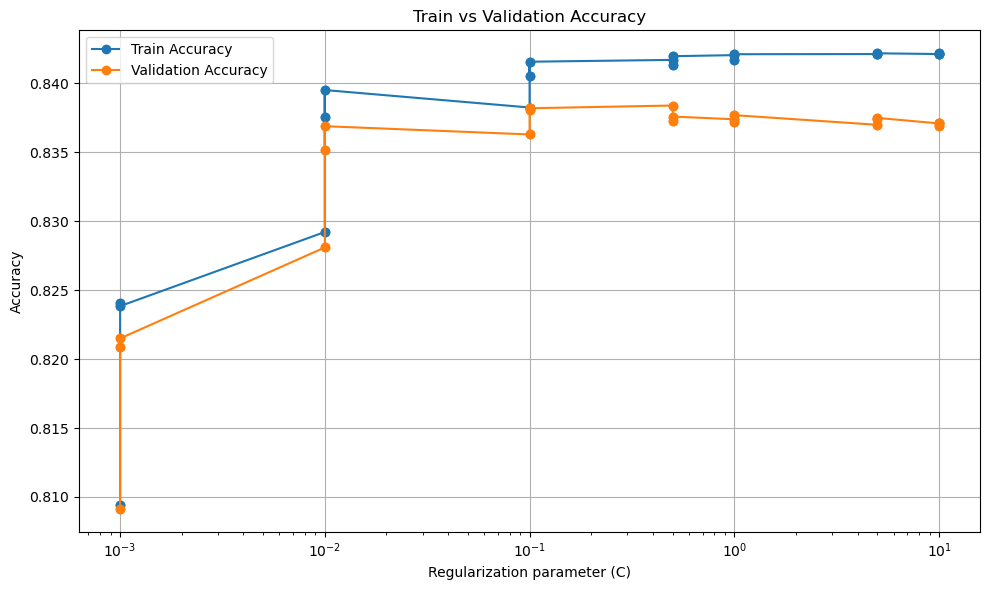

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Converti i risultati del grid search in DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Estrai le colonne di interesse
C_values = results['param_model__C'].astype(float)
train_scores = results['mean_train_score']
val_scores = results['mean_test_score']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(C_values, val_scores, marker='o', label='Validation Accuracy')
plt.xlabel('Regularization parameter (C)')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


SUBMISSION 0.8353

In [30]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

codice_text="base"# === Caricamento dati ===
train_df,exclude=extract_try(train_list,True,codice_text)
test_df,exclude=extract_try(test_list,False,codice_text)

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

#per chiarezza divisione delle features

features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42,
        C=0.1, 
        penalty="l2", 
        solver="liblinear"
    ))
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submissionsing.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
  

C:\Users\axelr\AppData\Local\Temp\ipykernel_2460\2703195016.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full=tipiSquadra2(agg_full.fillna(0),unique_types,lista)


Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_w

C:\Users\axelr\AppData\Local\Temp\ipykernel_2460\2966640789.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return train_df.fillna(0)


=== Risultati Cross-Validation (10-fold) ===
Accuracy : 0.8381
Precision: 0.8384
Recall   : 0.8376
F1-score : 0.8380
ROC AUC  : 0.9056

Confusion Matrix:
 [[4193  807]
 [ 812 4188]]

Classification Report:
               precision    recall  f1-score   support

           0      0.838     0.839     0.838      5000
           1      0.838     0.838     0.838      5000

    accuracy                          0.838     10000
   macro avg      0.838     0.838     0.838     10000
weighted avg      0.838     0.838     0.838     10000


Generating predictions on the test set...

✅ 'submission.csv' file created successfully!


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [31]:
# === 9️⃣ Submission ===
# Estrai i dati di test
test_df,exclude= extract_try(test_list, False,"base")  # Assicurati che test_list sia definito

# Prepara X_test
X_test = test_df.drop(columns=['battle_id'])

# Predizioni sul test set con il miglior modello
print("\n📤 Generating predictions for submission...")
test_predictions = best_model.predict(X_test)

# Crea il DataFrame di submission
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

# Salva in CSV
submission_df.to_csv('submission_gridsearch.csv', index=False)

print("\n✅ File 'submission_gridsearch.csv' creato con successo!")
display(submission_df.head())
display(submission_df['player_won'].value_counts())


status unici: ['par', 'fnt', 'frz', 'slp', 'brn', 'tox', 'psn']
EFFECTS unici: ['clamp', 'confusion', 'disable', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']


C:\Users\axelr\AppData\Local\Temp\ipykernel_2460\2703195016.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full=tipiSquadra2(agg_full.fillna(0),unique_types,lista)


Statistica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water'],
      dtype='object')
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_w

C:\Users\axelr\AppData\Local\Temp\ipykernel_2460\2966640789.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return train_df.fillna(0)


,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


player_won
0    2501
1    2499
Name: count, dtype: int64

In [32]:
#confronto pipe e best model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model, X, y, cv):
    """Valuta un modello con CV e stampa le metriche."""
    print(f"\n🔎 Valutazione del modello: {name}")
    y_pred = cross_val_predict(model, X, y, cv=cv, method='predict')
    y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc = roc_auc_score(y, y_prob)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {roc:.4f}")
    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC AUC": roc
    }

# 📊 Confronto diretto
results_pipe = evaluate_model("Base Pipeline (no grid)", pipe, X, y, cv)
results_grid = evaluate_model("GridSearch Best Model", grid_search.best_estimator_, X, y, cv)

# 📋 Tabella comparativa
comparison_df = pd.DataFrame([results_pipe, results_grid], index=["Base Pipeline", "GridSearch"])
print("\n📈 Confronto modelli:\n")
display(comparison_df)



🔎 Valutazione del modello: Base Pipeline (no grid)
Accuracy : 0.8381
Precision: 0.8384
Recall   : 0.8376
F1-score : 0.8380
ROC AUC  : 0.9056

🔎 Valutazione del modello: GridSearch Best Model
Accuracy : 0.8384
Precision: 0.8385
Recall   : 0.8382
F1-score : 0.8384
ROC AUC  : 0.9062

📈 Confronto modelli:



,Accuracy,Precision,Recall,F1-score,ROC AUC
Base Pipeline,0.8381,0.838438,0.8376,0.838019,0.905599
GridSearch,0.8384,0.838535,0.8382,0.838368,0.906215


Modello con tipi BINARI

In [33]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all_bin(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff_bin(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MATRIX ADV
    df_type_adv = compute_type_advantage(df_battle_timeline, df_chart,lista)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves,
        df_type_adv
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features.merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    ###train_df=compute_occtype_advantage(train_df, df_chart)
    print("Dinamica: ",train_df.columns)
    return train_df.fillna(0)

In [34]:
def extract_try_bin(lista, is_train,codice):
    df=extract_all_bin(lista,is_train)
    print("Colonne pre cambiamenti",df.columns)

    #per chiarezza divisione delle features
    type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
            'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
            'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
            'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
            'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
            'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

    status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

    effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
                "p1_effect_transform","p2_effect_transform"]

    #boost_cols= [ 'dif_boost_atk', 'dif_boost_def', 'dif_boost_spa','dif_boost_spd', 'dif_boost_spe']

    boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
        'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
        'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']

    move_type_cols=[ 'p1_movetype_ELECTRIC',
        'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
        'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
        'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
        'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
        'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
        'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
        'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
        'p2_movetype_WATER']

    move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
            'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

    match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
        'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']
    cols_to_drop=['eff_p1_on_p2','eff_p2_on_p1','type_adv_diff']
    if codice=="diff":
        match_cols+=['type_adv_diff']
        cols_to_drop = ['eff_p1_on_p2','eff_p2_on_p1']
    elif codice=="singoli":
        match_cols+=['eff_p1_on_p2','eff_p2_on_p1']
        cols_to_drop = ['type_adv_diff'] 
    #features da non scalare: contatori
    temp=type_cols+status_cols+effect_cols+move_type_cols+move_cat_cols
    exclude=['battle_id','player_won']+temp

    #RIMUOVI LE COLONNE
    df = df.drop(columns=cols_to_drop)
    print("Colonne post cambiamenti",df.columns)
    return df,exclude

In [35]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

codice_text="base"# === Caricamento dati ===
train_df,exclude=extract_try_bin(train_list,True,codice_text)
test_df,exclude=extract_try_bin(test_list,False,codice_text)

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

#per chiarezza divisione delle features

features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000, 
        random_state=42
    ))
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submissionbin.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
✅ Feature estratte: 35
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p

C:\Users\axelr\AppData\Local\Temp\ipykernel_2460\1684485203.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full = tipiSquadra2_bin(agg_full.fillna(0), unique_types, lista)
C:\Users\axelr\AppData\Local\Temp\ipykernel_2460\1684485203.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full = agg_full.fillna(0)


✅ Feature estratte: 35
Dinamica:  Index(['battle_id', 'base_hp', 'base_atk', 'base_def', 'base_spa', 'base_spd',
       'base_spe', 'level', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'player_won', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_poison', 'p2_psychic',
       'p2_rock', 'p2_water', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe', 'p1_movetype_ELECTRIC

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64